In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [18]:
np.unique(pd.read_csv("results/figshare/cnn/run_0.csv")["true"], return_counts=True)

(array([0, 1, 2]), array([ 708, 1426,  930]))

In [38]:
def create_metric(score, **kwargs):
    def apply_metric(y_true, y_pred):
        return score(y_true, y_pred, **kwargs)
    
    return apply_metric

def calculate_metric(model, subject_wise, metric, n=10000):
    folder = f"results/{'figshare-patients' if subject_wise else 'figshare'}/{model}"
    scores = list()
    for run in range(5):
        if model == "rocket":
            results = pd.read_csv(f"{folder}/{n}_kernels_run_{run}.csv")
        elif model == "minirocket":
            results = pd.read_csv(f"{folder}/{n}_features_run_{run}.csv")
        else:
            results = pd.read_csv(f"{folder}/run_{run}.csv")

        scores.append(metric(results["true"], results["pred"]))

    return np.array(scores)

def get_runtime(model, subject_wise, n=10000):
    folder = f"results/{'figshare-patients' if subject_wise else 'figshare'}/{model}"
    runtimes = list()
    for run in range(5):
        if model == "rocket":
            filename = f"{folder}/{n}_kernels_run_{run}_runtime.txt"
        elif model == "minirocket":
            filename = f"{folder}/{n}_features_run_{run}_runtime.txt"
        else:
            filename = f"{folder}/run_{run}_runtime.txt"

        with open(filename, "r") as f:
            runtimes.append(float(f.read()))

    return np.array(runtimes)

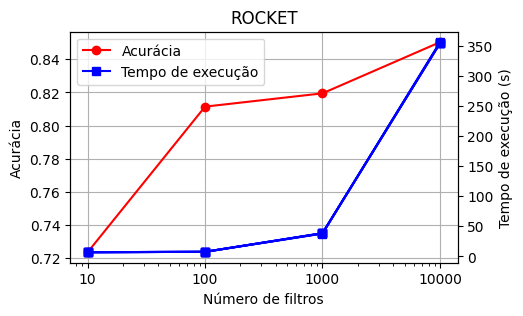

In [95]:
kernels = [10, 100, 1000, 10000]

rocket_acc = np.array([np.mean(calculate_metric("rocket", True, create_metric(accuracy_score), n)) for n in kernels])
rocket_run = np.array([get_runtime("rocket", True, n) for n in kernels])

fig, ax = plt.subplots(figsize=(5,3))

ax.set_title("ROCKET")
ax.grid()
ax.set_xlabel("Número de filtros")
ax.set_ylabel("Acurácia")
line1 = ax.plot(kernels, rocket_acc, "ro-")
ax.set_xscale("log")
ax.set_xticks(kernels, labels=map(str, kernels))
ax0 = ax.twinx()
ax0.set_ylabel("Tempo de execução (s)")
line2 = ax0.plot(kernels, rocket_run, "bs-")
ax.legend(line1 + line2, ["Acurácia", "Tempo de execução"])

plt.savefig("rocket_graph.pdf", bbox_inches="tight")

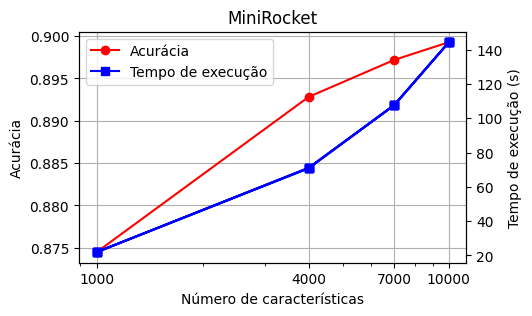

In [96]:
features = [1000, 4000, 7000, 10000]

minirocket_acc = np.array([np.mean(calculate_metric("minirocket", True, create_metric(accuracy_score), n)) for n in features])
minirocket_run = np.array([get_runtime("minirocket", True, n) for n in features])

fig, ax = plt.subplots(figsize=(5,3))

ax.set_title("MiniRocket")
ax.grid()
ax.set_xlabel("Número de características")
ax.set_ylabel("Acurácia")
line1 = ax.plot(features, minirocket_acc, "ro-")
ax.set_xscale("log")
ax.set_xticks(features, labels=map(str, features))
ax1 = ax.twinx()
ax1.set_ylabel("Tempo de execução (s)")
line2 = ax1.plot(features, minirocket_run, "bs-")
ax.legend(line1 + line2, ["Acurácia", "Tempo de execução"])

plt.savefig("minirocket_graph.pdf", bbox_inches="tight")
